In [1]:
# read mat files, save as nrrd files to precosess it the same way as the GCN data
# define logging and working directory
from ProjectRoot import change_wd_to_project_root 
change_wd_to_project_root()
from pyforest import *
from src.utils.notebook_imports import *

search for root_dir and set working directory
Working directory set to: /mnt/data/git/cardio


In [2]:
data_root = '/mnt/data/datasets/cardio/master_sophie_tschopp/AS'

In [3]:
test_files = glob.glob(os.path.join(data_root, '*.mat'))
len(test_files)

28

# load one image and mask

In [5]:
from scipy.io import loadmat
test_img = test_files[0]
test_mask = test_files[1]
print(test_img)
img = loadmat(test_img)
msk = loadmat(test_mask)

/mnt/data/datasets/cardio/master_sophie_tschopp/AS/NMRT_TAVI_PRE_025_Atria-2020-03-23.mat


# Each image has the following structure: 

dict_keys(['__header__', '__version__', '__globals__', 'preview', 'info', 'im', 'setstruct'])

In [8]:
img.keys()

dict_keys(['__header__', '__version__', '__globals__', 'preview', 'info', 'im', 'setstruct'])

# Image is a dict, show all key, value pairs

In [13]:
@interact
def inspect_mat_file(key=img.keys()):
    print(key)
    temp = msk[key]
    try:
        print(temp.shape)
    except:
        pass
    return msk[key]

interactive(children=(Dropdown(description='key', options=('__header__', '__version__', '__globals__', 'previe…

# Parse the metadata

In [10]:
img['info']

array([[(array(['NMRT_TAVI_pre_025 '], dtype='<U18'), array(['NMRT_TAVI_pre_025 '], dtype='<U18'), array(['19340425'], dtype='<U8'), array(['F '], dtype='<U2'), array([[82]], dtype=uint8), array(['20160818'], dtype='<U8'), array([], shape=(0, 0), dtype=uint8), array([[65]], dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([], dtype='<U1'), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([[1]], dtype=uint8), array([[0]], dtype=uint8), array([[1]], dtype=uint8), array(['MR'], dtype='<

In [11]:
temp = img['info']
type(temp)
temp.shape
temp[0]


numpy.ndarray

(1, 1)

array([(array(['NMRT_TAVI_pre_025 '], dtype='<U18'), array(['NMRT_TAVI_pre_025 '], dtype='<U18'), array(['19340425'], dtype='<U8'), array(['F '], dtype='<U2'), array([[82]], dtype=uint8), array(['20160818'], dtype='<U8'), array([], shape=(0, 0), dtype=uint8), array([[65]], dtype=uint8), array([], shape=(0, 0), dtype=uint8), array([], dtype='<U1'), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([[0]], dtype=uint8), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([], dtype='<U1'), array([[1]], dtype=uint8), array([[0]], dtype=uint8), array([[1]], dtype=uint8), array(['MR'], dtype='<U

In [58]:
type(temp[0])
len(temp[0].dtype.names)
temp[0].dtype.names

numpy.ndarray

35

('Name',
 'ID',
 'BirthDate',
 'Sex',
 'Age',
 'AcquisitionDate',
 'Length',
 'Weight',
 'BSA',
 'Institution',
 'NFrames',
 'NumSlices',
 'ResolutionX',
 'ResolutionY',
 'SliceThickness',
 'SliceGap',
 'TIncr',
 'EchoTime',
 'FlipAngle',
 'AccessionNumber',
 'StudyUID',
 'StudyID',
 'NumberOfAverages',
 'RepetitionTime',
 'InversionTime',
 'TDelay',
 'VENC',
 'Scanner',
 'ImagingTechnique',
 'ImageType',
 'ImageViewPlane',
 'IntensityScaling',
 'IntensityOffset',
 'MultiDataSet',
 'Modality')

# Extract the metadata

In [14]:
# extract the metadata
for keys, value in zip( img['info'][0].dtype.names, img['info'][0][0]) :
    print(keys, ' : ', value)

Name  :  ['NMRT_TAVI_pre_025 ']
ID  :  ['NMRT_TAVI_pre_025 ']
BirthDate  :  ['19340425']
Sex  :  ['F ']
Age  :  [[82]]
AcquisitionDate  :  ['20160818']
Length  :  []
Weight  :  [[65]]
BSA  :  []
Institution  :  []
NFrames  :  [[0]]
NumSlices  :  [[0]]
ResolutionX  :  [[0]]
ResolutionY  :  [[0]]
SliceThickness  :  [[0]]
SliceGap  :  [[0]]
TIncr  :  [[0]]
EchoTime  :  [[0]]
FlipAngle  :  [[0]]
AccessionNumber  :  []
StudyUID  :  []
StudyID  :  []
NumberOfAverages  :  [[0]]
RepetitionTime  :  [[0]]
InversionTime  :  [[0]]
TDelay  :  [[0]]
VENC  :  [[0]]
Scanner  :  []
ImagingTechnique  :  []
ImageType  :  []
ImageViewPlane  :  []
IntensityScaling  :  [[1]]
IntensityOffset  :  [[0]]
MultiDataSet  :  [[1]]
Modality  :  ['MR']


# img['preview'] shows one slice in long axis and short axis view

In [15]:
temp = img['preview']

In [16]:
temp.shape
import matplotlib.pyplot as plt

(512, 256, 3)

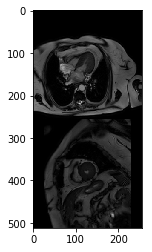

In [17]:
plt.imshow(temp)

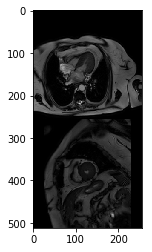

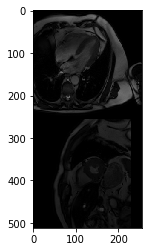

In [18]:
plt.imshow(img['preview'])
plt.show()
plt.imshow(msk['preview'])

# inspect setstruct, this is the biggest object

In [19]:
# setstruct has two lists, each with a length of 184 elements
# The first element of the first list msk['setstruct'][0,0][0] is a 3D volume
# The first element of the 2nd list msk['setstruct'][0,1][1] is a 4D volume
msk['setstruct'].shape
len(msk['setstruct'][0,0])
len(msk['setstruct'][0,1])


(1, 2)

184

184

In [25]:
temp = list(msk['setstruct'][0,0])
temp2 = list(msk['setstruct'][0,1])

In [26]:
@interact
def show_list(i=(0,len(temp)-1)):
    print(temp[i].shape)
    print(len(temp[i]))
    try:
        plt.imshow(temp[i])
        
    except:
        pass
    return temp[i]

interactive(children=(IntSlider(value=91, description='i', max=183), Output()), _dom_classes=('widget-interact…

In [95]:
msk['setstruct'][0,0][0].shape

(352, 352, 50)

In [96]:
msk['setstruct'][0,1][0].shape

(352, 352, 50, 14)

In [22]:
@interact
def show_volume(channel = (0,msk['setstruct'][0,0][0].shape[-1]-1)):
    plt.imshow(msk['setstruct'][0,0][0][...,channel])

interactive(children=(IntSlider(value=24, description='channel', max=49), Output()), _dom_classes=('widget-int…

In [21]:
@interact
def show_volume(channel = (0,msk['setstruct'][0,1][0].shape[-2]-1), z = (0,msk['setstruct'][0,1][0].shape[-1]-1)):
    plt.imshow(msk['setstruct'][0,1][0][...,channel,z])

interactive(children=(IntSlider(value=24, description='channel', max=49), IntSlider(value=6, description='z', …

In [115]:
temp = list(msk['setstruct'][0,0])
temp2 = list(msk['setstruct'][0,1])

In [118]:
len(temp)
len(temp2)

184

184

In [23]:
@interact
def show_list(i=(0,len(temp)-1)):
    print(temp[i].shape)
    print(len(temp[i]))
    try:
        plt.imshow(temp[i])
    except:
        pass
    return temp[i]

interactive(children=(IntSlider(value=255, description='i', max=511), Output()), _dom_classes=('widget-interac…

In [119]:
@interact
def show_list(i=(0,len(temp2)-1)):
    print(temp2[i].shape)
    print(len(temp2[i]))
    try:
        plt.imshow(temp2[i])
    except:
        pass
    return temp2[i]

interactive(children=(IntSlider(value=91, description='i', max=183), Output()), _dom_classes=('widget-interact…